### AI Bauchi 6 Weeks Computer Vision Bootcamp

<div style="display: flex; justify-content: space-evenly; align-items: center; width: 100%;">
<img src="https://github.com/AIBauchi/AIBauchi-Computer-Vision-Bootcamp/blob/main/logos/aib.png?raw=1" width='100px'/>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeyMRtudTwUIhRHGT1VKvVbnRYTu8VaQtaHg&s" width='100px'/>
<img src="https://miro.medium.com/v2/resize:fit:800/0*qa3Uh-1JZUhCuBVK.png" width='100px'/>
</div>

---
# Introduction to Convolutional Neural Networks (CNN)

### Introduction:
Convolutional Neural Networks (CNNs) are a specialized type of deep learning model widely used for processing and analyzing visual data, such as images and videos. CNNs have achieved remarkable success in computer vision tasks, including image classification, object detection, and image segmentation. They are designed to automatically learn hierarchical representations of visual patterns directly from raw pixel data.


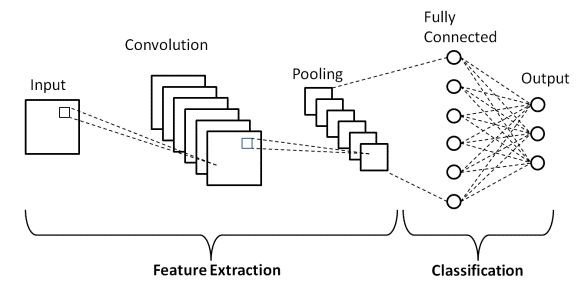


### Key Concepts of CNNs:

1. **Convolutional Layers**: The core building blocks of CNNs are convolutional layers. These layers apply a set of learnable filters (also known as kernels) to the input data. The filters perform local receptive field operations, scanning the input and producing feature maps that capture different aspects of the data. Convolutional layers enable the network to extract meaningful visual features and learn spatial hierarchies.
  
  #### **Operations in convolution Layer**

  ##### i. Filters (Kernels)

  Filters (or kernels) are small matrices used in the convolution operation to detect specific features in the input data. Each filter is responsible for detecting different patterns, such as edges, textures, or colors.

  ##### ii. Kernel Size

  The kernel size defines the dimensions of the convolutional filter. Common sizes are 3x3, 5x5, or 7x7. The choice of kernel size affects the receptive field and the level of detail captured from the input data.

  ##### iii. Strides

  Strides determine the step size with which the convolutional filter moves across the input data. It affects the spatial dimensions of the output feature map.

  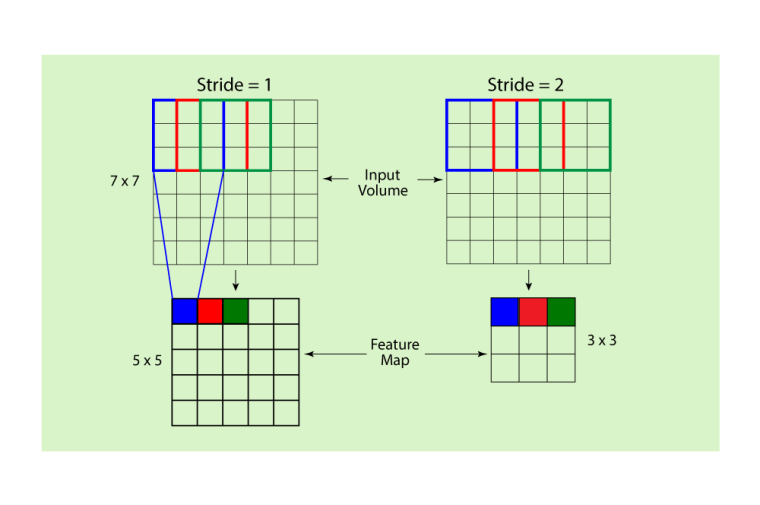

  ##### iv. Padding

  Padding refers to the practice of adding extra pixels around the border of the input data to control the spatial dimensions of the output feature map.

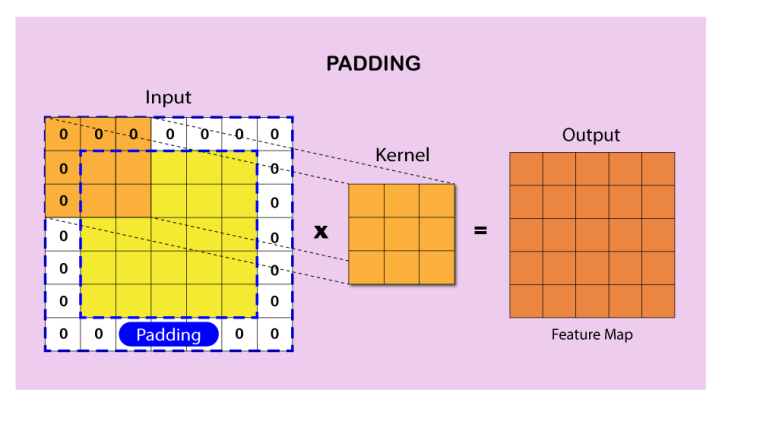

2. **Pooling Layers**: Pooling layers are typically used after convolutional layers to downsample the feature maps. They reduce the spatial dimensions while retaining the most salient information. Common pooling operations include max pooling and average pooling, which extract the maximum or average value within each pooling region, respectively. Pooling helps to reduce the computational complexity and makes the network more robust to spatial translations.

**Activation Functions**: Activation functions introduce non-linearities into the network, allowing it to model complex relationships. Common activation functions used in CNNs include ReLU (Rectified Linear Unit), which sets negative values to zero, and softmax, which produces normalized probabilities for multi-class classification tasks.

**Fully Connected Layers**: Towards the end of the CNN architecture, one or more fully connected layers are often employed. These layers connect every neuron in one layer to every neuron in the subsequent layer. Fully connected layers aggregate information from the previous layers and perform the final classification or regression.

**Training and Backpropagation**: CNNs are trained using the backpropagation algorithm, where the network adjusts its weights and biases to minimize a loss function. This process involves forward propagation to compute predictions, comparing them to the ground truth, and backpropagating the errors to update the network parameters using gradient descent or its variants.

### Applications of CNNs:
CNNs have demonstrated outstanding performance in various computer vision tasks, including:

**Image Classification**: Assigning labels to images from a predefined set of classes.
**Object Detection**: Locating and classifying objects within an image.
**Image Segmentation**: Assigning a label to each pixel, separating objects from the background.
**Facial Recognition**: Identifying and verifying individuals based on facial features.
**Medical Image Analysis**: Diagnosing diseases and detecting abnormalities in medical images.
**Autonomous Driving**: Analyzing road scenes and detecting objects for self-driving vehicles.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers

In [34]:
# Create a CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10)
])

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 16)          9232      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 1, 1, 16)         

In [36]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
from keras.datasets import mnist
# Load the dataset (e.g., mnist)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
train_images.max()

255

In [29]:
train_images =train_images/train_images.max()
test_images = test_images/test_images.max()

In [30]:
# prompt: create validation set

# Split the training data into training and validation sets
val_images = train_images[:5000]
val_labels = train_labels[:5000]

train_images = train_images[5000:]
train_labels = train_labels[5000:]


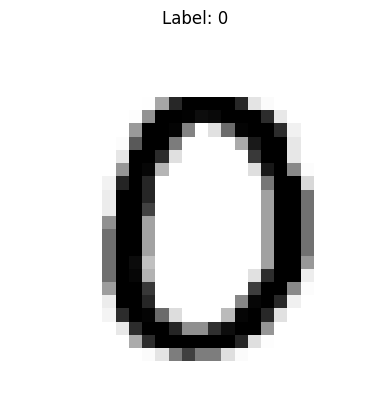

In [31]:
import matplotlib.pyplot as plt
num  = 10
plt.imshow(train_images[num], cmap='gray_r')
plt.title(f"Label: {train_labels[num]}")
plt.axis('off')
plt.show()

In [37]:
# Train the model
model_history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images,val_labels))

Epoch 1/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.3477 - accuracy: 0.8894 - val_loss: 0.1382 - val_accuracy: 0.9598
Epoch 2/10
1719/1719 [==============================] - 47s 28ms/step - loss: 0.1198 - accuracy: 0.9627 - val_loss: 0.0997 - val_accuracy: 0.9718
Epoch 3/10
1719/1719 [==============================] - 50s 29ms/step - loss: 0.0852 - accuracy: 0.9738 - val_loss: 0.0772 - val_accuracy: 0.9772
Epoch 4/10
1719/1719 [==============================] - 47s 28ms/step - loss: 0.0685 - accuracy: 0.9785 - val_loss: 0.0678 - val_accuracy: 0.9814
Epoch 5/10
1719/1719 [==============================] - 51s 29ms/step - loss: 0.0553 - accuracy: 0.9825 - val_loss: 0.0612 - val_accuracy: 0.9838
Epoch 6/10
1719/1719 [==============================] - 47s 27ms/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0590 - val_accuracy: 0.9838
Epoch 7/10
1719/1719 [==============================] - 48s 28ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0481 -

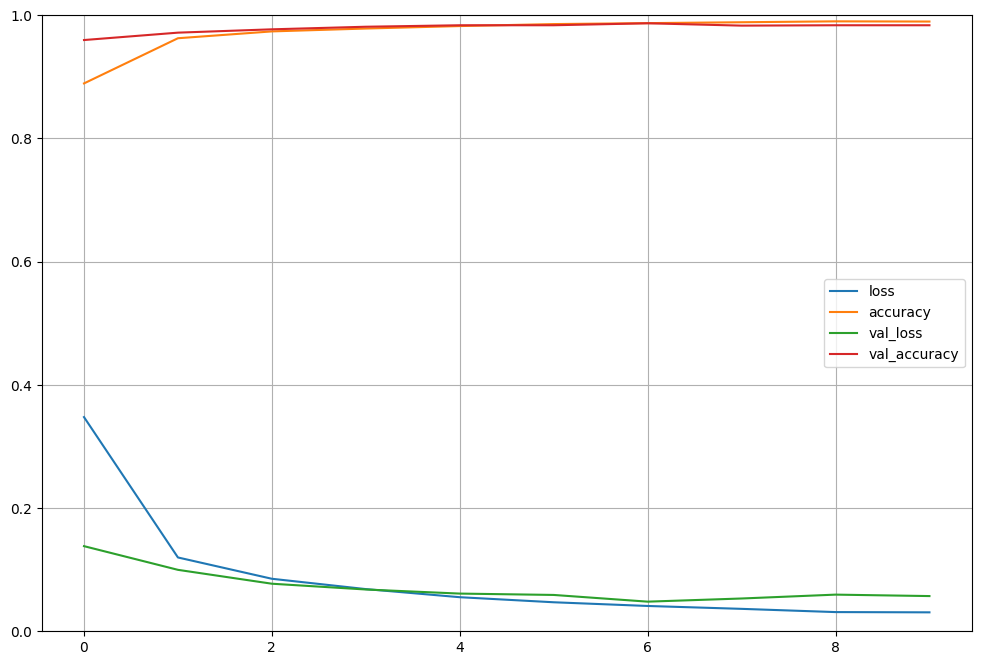

In [38]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [40]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 18ms/step - loss: 0.0527 - accuracy: 0.9846


[0.052686017006635666, 0.9846000075340271]

In [41]:
model.evaluate(val_images, val_labels)

157/157 [==============================] - 2s 11ms/step - loss: 0.0572 - accuracy: 0.9838


[0.057152751833200455, 0.9837999939918518]

## Class Activity

Train a CNN on cifar dataset

In [42]:
# load dataset

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [43]:
x_train.shape

(50000, 32, 32, 3)

In [44]:
class_list = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

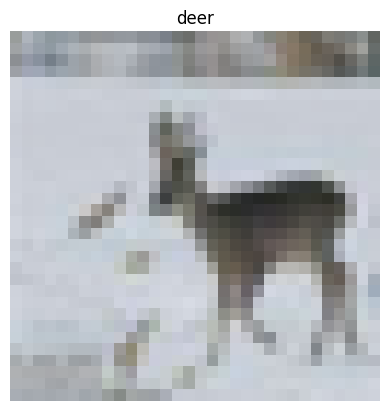

In [46]:
plt.imshow(x_train[20])
plt.title(class_list[y_train[20][0]])
plt.axis('off')
plt.show()